<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_08/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08



<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_08/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [ ]:
columnas=df.columns         #nombre de las columnas del dataframe
num=pd.DataFrame()          #dataframe para guardar las columnas con variables numericas
cat=pd.DataFrame()          #dataframe para guardar las columnas con variables categoricas

for i in columnas:          #ciclo for para identificar el tipo de variable de una columna y guardarlo en el dataframe correspondiente
  if df[i].dtype==object:
    cat[i]=df[i]
  else:
    num[i]=df[i]

In [ ]:
num

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,2.5,4.0,522.764706,0.222671
1,1984,4.2,6.0,683.615385,0.291185
2,1985,2.5,4.0,555.437500,0.236588
3,1985,4.2,6.0,683.615385,0.291185
4,1987,3.8,6.0,555.437500,0.236588
...,...,...,...,...,...
36786,2015,1.0,3.0,244.000000,0.105150
36787,2016,0.9,3.0,246.000000,0.108155
36788,2016,0.9,3.0,255.000000,0.111336
36789,2017,0.9,3.0,248.000000,0.108155


In [ ]:
scaler=MinMaxScaler()
for i in num.columns:
  prom=num[i].mean()
  num[i]=num[i].fillna(prom)
num_col=num.columns
num[num_col]=scaler.fit_transform(num[num_col])


In [ ]:
num

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294
...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878
36787,0.941176,0.038462,0.071429,0.174919,0.090196
36788,0.941176,0.038462,0.071429,0.182174,0.096886
36789,0.970588,0.038462,0.071429,0.176532,0.090196


In [ ]:
cat

,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
1,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
2,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
3,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
4,Coches Medianos,dos,Automatica,Premium,grande,alto,alto
...,...,...,...,...,...,...,...
36786,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo
36787,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo
36788,Coches pequeños,dos,Manual,Premium,muy pequeño,muy bajo,muy bajo
36789,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo


In [ ]:
neo_cat= pd.get_dummies(cat[cat.columns])
neo_cat

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


Gracias al comando get_dummies se puede convertir una columna con valores categoricos a columnas con 0 y 1, donde se obtiene una columna por cada una de las clases que hay en esa columna y estas columnas indican la clase que muestra ese dato en esa columna.

In [ ]:
df_procesado= pd.concat([num, neo_cat], axis=1, sort=False)
df_procesado

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0.941176,0.038462,0.071429,0.174919,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0.941176,0.038462,0.071429,0.182174,0.096886,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0.970588,0.038462,0.071429,0.176532,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas
    
    

In [ ]:
#se ajusta el modelo kmeans al conjunto de datos procesados
kmeans= KMeans(n_clusters=8, n_init=25, random_state=39)
kmeans.fit(df_procesado)

centroids= kmeans.cluster_centers_  #centroides del ajuste
cluster= kmeans.labels_             #clusters del ajuste

In [ ]:
#se etiquetan al cluster que pertenecen a los datos del df original
neo_df=df.copy()
neo_df['cluster']=cluster
neo_df['cluster']=neo_df['cluster'].astype('category')
neo_df

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla,cluster
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671,4
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185,2
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588,4
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185,2
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,2015,1.0,3.0,244.000000,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo,0.105150,3
36787,2016,0.9,3.0,246.000000,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo,0.108155,3
36788,2016,0.9,3.0,255.000000,Coches pequeños,dos,Manual,Premium,muy pequeño,muy bajo,muy bajo,0.111336,5
36789,2017,0.9,3.0,248.000000,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo,0.108155,3


In [ ]:
#obtencion de los centroides de cada cluster
columnas=df_procesado.columns
df_centroids=pd.DataFrame(centroids, columns=columnas)
df_centroids["cluster"]=[1, 2, 3, 4, 5, 6, 7, 8]
df_centroids

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,cluster
0,0.524300,0.250770,0.195525,0.304420,0.226575,6.228750e-02,0.095063,0.045696,0.153543,0.448524,...,9.768802e-01,8.271162e-15,1.276756e-14,2.311982e-02,6.966649e-15,9.922481e-01,6.391949e-03,-7.882583e-15,1.359989e-03,1
1,0.409092,0.333846,0.258067,0.354202,0.281278,1.785023e-01,0.083925,0.093447,0.135733,0.181892,...,3.163331e-02,9.632021e-01,1.090794e-14,5.164622e-03,1.452550e-03,6.455778e-04,9.979019e-01,-1.693090e-15,-1.376677e-14,2
2,0.384236,0.585590,0.430797,0.510289,0.454503,2.592502e-01,0.005599,0.059153,0.059396,0.197420,...,-6.938894e-15,1.168452e-02,9.571568e-01,-5.967449e-15,1.703992e-03,7.216450e-16,4.868549e-04,9.978092e-01,-9.936496e-15,3
3,0.695702,0.179404,0.150728,0.240178,0.156814,7.771561e-16,0.110189,0.027742,0.181747,0.546539,...,-3.996803e-15,2.592689e-04,3.635980e-15,9.997407e-01,1.387779e-16,1.737101e-02,5.185377e-04,1.249001e-15,9.821104e-01,4
4,0.476852,0.450916,0.327240,0.409956,0.343253,3.042549e-01,0.017105,0.041480,0.048535,0.150951,...,-7.022161e-15,4.062433e-02,8.552491e-04,-6.078471e-15,9.950823e-01,6.414368e-04,6.414368e-04,3.634809e-03,-1.004752e-14,5
5,0.438404,0.159576,0.141184,0.242287,0.156504,1.640712e-02,0.124861,0.006396,0.092881,0.709956,...,-2.747802e-15,1.443290e-15,2.609024e-15,1.000000e+00,-2.220446e-16,2.780868e-03,1.390434e-03,1.665335e-16,9.958287e-01,6
6,0.588065,0.362121,0.299467,0.354068,0.282213,1.512097e-03,0.083921,0.086442,0.190020,0.561240,...,2.746976e-02,9.720262e-01,4.163336e-15,-5.939693e-15,2.318548e-02,7.494005e-16,9.768145e-01,1.665335e-15,-7.327472e-15,7
7,0.452443,0.562730,0.405562,0.501887,0.442585,4.354414e-01,0.001318,0.003953,0.010211,0.058300,...,-1.637579e-15,5.599473e-03,9.367589e-01,-5.606626e-15,-1.693090e-15,7.216450e-16,-2.775558e-15,1.000000e+00,-4.302114e-15,8


In [ ]:
import statistics
print("resumen de las principales caracteristicas de cada cluster")
clusters= [0, 1, 2, 3, 4, 5, 6, 7]
col=df.columns
for i in clusters:
  print("cluster", i+1)
  mask_temporal= neo_df["cluster"]==i
  df_aux= neo_df.loc[mask_temporal, :]
  for j in col:
    if neo_df[j].dtypes=="object":
      print(j,":", statistics.mode(df_aux[j]))
    else:
      print(j, ":", round(df_aux[j].mean(), 1))
  print("")
  

resumen de las principales caracteristicas de cada cluster
cluster 1
year : 2001.8
desplazamiento : 2.6
cilindros : 4.7
co2 : 406.7
clase_tipo : Coches pequeños
traccion_tipo : dos
transmision_tipo : Automatica
combustible_tipo : Normal
tamano_motor_tipo : pequeño
consumo_tipo : bajo
co2_tipo : bajo
consumo_litros_milla : 0.2

cluster 2
year : 1997.9
desplazamiento : 3.2
cilindros : 5.6
co2 : 468.4
clase_tipo : Coches pequeños
traccion_tipo : dos
transmision_tipo : Automatica
combustible_tipo : Normal
tamano_motor_tipo : mediano
consumo_tipo : moderado
co2_tipo : moderado
consumo_litros_milla : 0.2

cluster 3
year : 1997.1
desplazamiento : 5.2
cilindros : 8.0
co2 : 662.0
clase_tipo : Furgoneta
traccion_tipo : dos
transmision_tipo : Automatica
combustible_tipo : Normal
tamano_motor_tipo : muy grande
consumo_tipo : muy alto
co2_tipo : muy alto
consumo_litros_milla : 0.3

cluster 4
year : 2007.7
desplazamiento : 2.0
cilindros : 4.1
co2 : 327.0
clase_tipo : Coches pequeños
traccion_tipo : 

### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


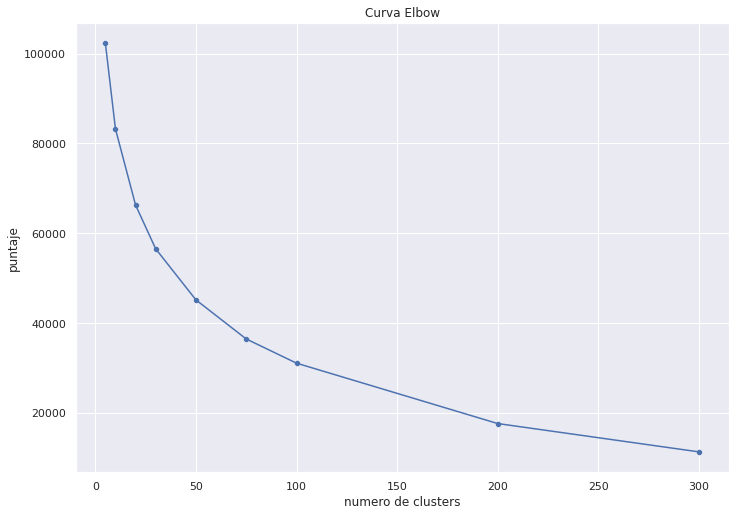

In [ ]:
num_cluster= [5, 10, 20, 30, 50, 75, 100, 200, 300]
kmeans=[KMeans(n_clusters= i) for i in num_cluster]
score=[kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]
df_codo= pd.DataFrame({'numero de clusters': num_cluster, 'puntaje': score})

sns.lineplot(x= "numero de clusters", y= "puntaje", data= df_codo)
sns.scatterplot(x= "numero de clusters", y= "puntaje", data= df_codo)
plt.title("Curva Elbow")
plt.show()

A tráves del gráfico obtenido por la regla del codo, se logra ver que por 300 cluster se estabiliza la reduccion en la suma total de cuadrados internos. Por lo tanto, para este conjunto de datos 300 clusters es una buena opción.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases). 

El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris[target] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#analisis exploratorio de las caracteristicas

iris[features].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# analisis algoritmo PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pca_pipe= make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(iris[features])

modelo_pca= pca_pipe.named_steps['pca']    #modelo entrenado del pipeline

pca=pd.DataFrame(data= modelo_pca.components_, columns= features, index= ['PC1', 'PC2', 'PC3', 'PC4'])    #dataframe con informacion de 4 PCA aplicable a los datos
pca

,sepal_length,sepal_width,petal_length,petal_width
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942
PC3,-0.719566,0.244382,0.142126,0.634273
PC4,-0.261286,0.123510,0.801449,-0.523597


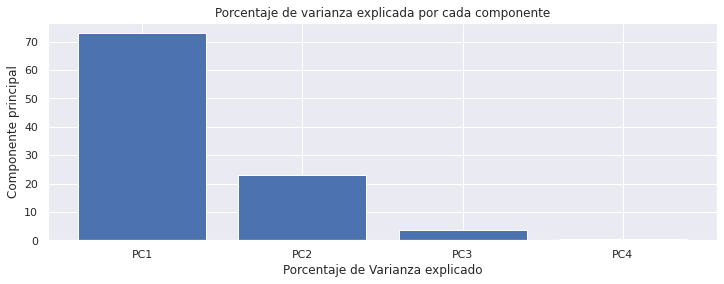

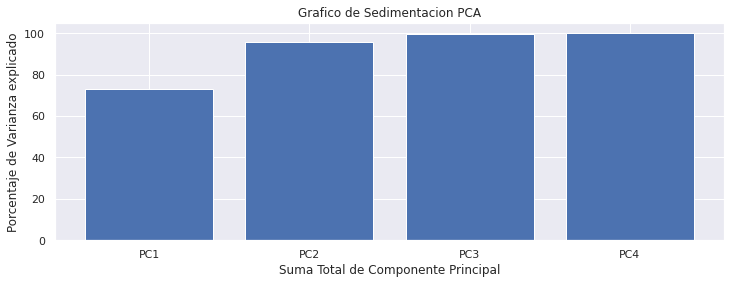

In [ ]:
#graficos de varianza por componente y varianza por la suma acumulada de las componentes

percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)       #varianza porcentual
columnas = ['PC1', 'PC2', 'PC3', 'PC4']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,5), height=percent_variance, tick_label=columnas)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Porcentaje de Varianza explicado')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

percent_variance_cum = np.cumsum(percent_variance)                                        #varianza porcentual acumulada
columns = ['PC1', 'PC1+PC2', 'PC1+PC2+PC3', 'PC1+PC2+PC3+PC4']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,5), height=percent_variance_cum, tick_label=columnas)
plt.ylabel('Porcentaje de Varianza explicado')
plt.xlabel('Suma Total de Componente Principal')
plt.title('Grafico de Sedimentacion PCA')
plt.show()

Si se empleasen unicamente las dos primeras componentes se consiguiria explicar aproximadamente el 95% de la varianza observada, lo cual es una gran porcentaje de la varianza usando un numero relativamente pequeño de componentes.

In [ ]:
#analisis de las proyecciones de las observaciones de entrenamiento
proyection= pca_pipe.transform(X= iris[features])
proyections= pd.DataFrame(proyection, columns=columnas, index= iris.index)
proyections[target]=iris['species'] 
proyections.head(15)

,PC1,PC2,PC3,PC4,species
0,-2.264703,0.480027,-0.127706,-0.024168,0
1,-2.080961,-0.674134,-0.234609,-0.103007,0
2,-2.364229,-0.341908,0.044201,-0.028377,0
3,-2.299384,-0.597395,0.091290,0.065956,0
4,-2.389842,0.646835,0.015738,0.035923,0
5,-2.075631,1.489178,0.026968,-0.006608,0
6,-2.444029,0.047644,0.335470,0.036776,0
7,-2.232847,0.223148,-0.088695,0.024612,0
8,-2.334640,-1.115328,0.145077,0.026859,0
9,-2.184328,-0.469014,-0.253766,0.039899,0


In [ ]:
proyections[50:65]

,PC1,PC2,PC3,PC4,species
50,1.101781,0.862972,-0.684586,-0.034834,1
51,0.731337,0.594615,-0.094122,-0.004904,1
52,1.240979,0.616298,-0.554007,-0.009423,1
53,0.407483,-1.754404,-0.023102,-0.065769,1
54,1.075475,-0.208421,-0.398256,-0.104737,1
55,0.388687,-0.593284,0.124192,0.240831,1
56,0.746530,0.773019,0.148969,0.077370,1
57,-0.487323,-1.852429,0.249265,0.040520,1
58,0.927902,0.032226,-0.596169,0.029880,1
59,0.011426,-1.034018,0.538899,0.028461,1


In [ ]:
proyections.tail(15)

,PC1,PC2,PC3,PC4,species
135,2.798770,0.856803,-0.542906,-0.295881,2
136,1.576256,1.068581,0.945854,-0.035606,2
137,1.346292,0.422431,0.180875,0.215421,2
138,0.924825,0.017223,0.416826,-0.005238,2
139,1.852045,0.676128,-0.012672,-0.195195,2
140,2.014810,0.613886,0.428333,-0.247538,2
141,1.901784,0.689575,0.130075,-0.469697,2
142,1.157882,-0.698870,0.530160,0.040521,2
143,2.040558,0.867521,0.338144,-0.045187,2
144,1.998147,1.049169,0.632413,-0.214045,2


Al ver algunos de los resultados obtenidos por las transformaciones de estos PCA, se logra ver que el PCA1 es el mejor para identificar la especie 0 (Versicolor) y la especie 1 (setosa), mientra que el PCA4 es el mejor para identificar la especie 2 (Virginica).

In [ ]:
#analisis algoritmo TSNE
scaler = StandardScaler()

X = iris.drop(columns='species')
y = iris['species']
    
embedding = TSNE(n_components=2)
X_transform = embedding.fit_transform(X)
    
df_tsne = pd.DataFrame(X_transform,columns = ['_DIM_1_','_DIM_2_'])
df_tsne['species'] = y

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


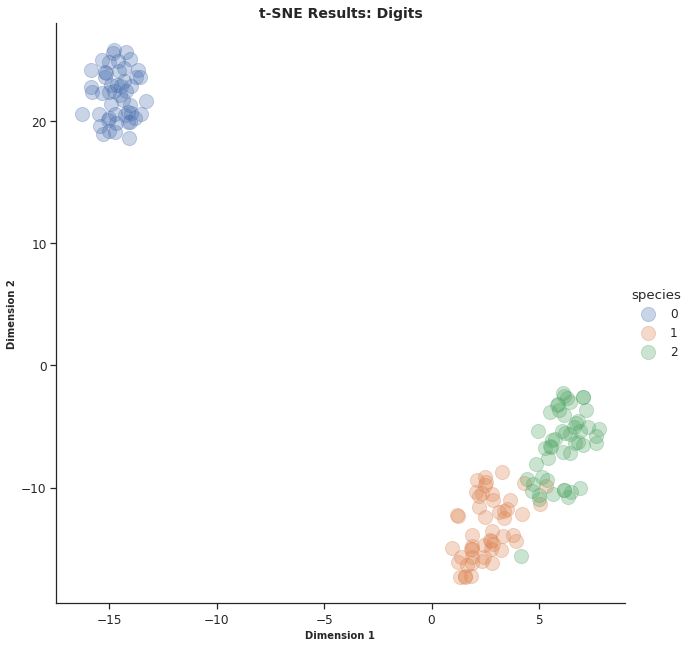

In [ ]:
#grafico de los digitos obtenidos por TSNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=df_tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

Ahora veamos los resultados que se obtienen con un PCA de 2 componentes

In [ ]:
# PCA
scaler = StandardScaler()

X = iris.drop(columns='species')
y = iris['species']
    
embedding = PCA(n_components=2)
X_transform = embedding.fit_transform(X)
    
df_pca = pd.DataFrame(X_transform,columns = ['Score1','Score2'])
df_pca['species'] = y

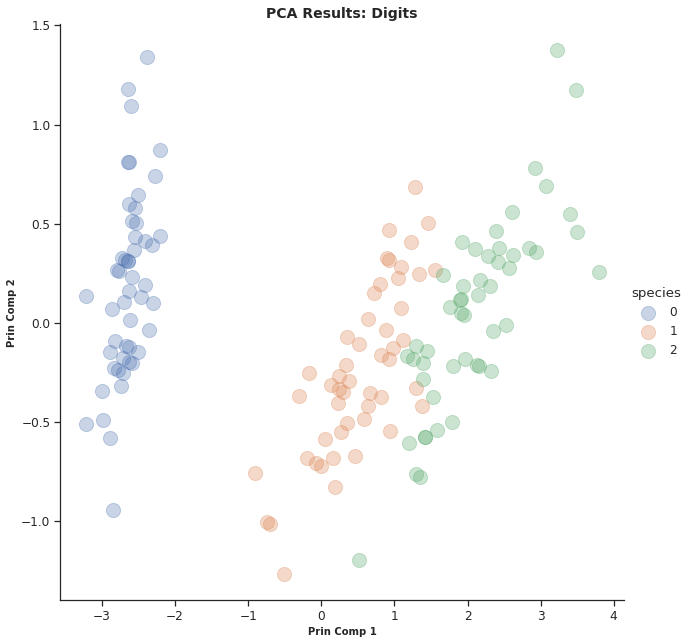

In [ ]:
#grafico digitos PCA
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='Score1',
           y='Score2',
           data=df_pca,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

Comparando los resultados obtenidos por PCA y TSNE, se logra ver que ambos fueron métodos nos permiten identificar la especie a la cual pertenecen y formar clusters de las especies, pero los clusters obtenidos por TSNE son menos dispersos en compraracion a los obtenidos por PCA. Tambien, se logra ver que la cantidad de intersecciones de elementos de las especies 1 y 2 son menores en el grafico obtenido por PCA en comparacion al grafico obtenidos por TSNE. Si usamos tambien el metodo de K-Means, entregaria mejores resultados con los datos obtenidos por TSNE que con PCA para hacer clusters por especie.